In [266]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline  

Data description

In [223]:
df_zomato = pd.read_csv('zomato.csv')
df_zomato.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [224]:
df_zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [225]:
df_zomato.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [226]:
print(df_zomato.shape)
print(df_zomato.columns)

(51717, 17)
Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


Removing Unnecessary Columns

In [227]:
df_zomato.drop(['url','phone', 'address', 'menu_item'],inplace =True,axis=1)

In [228]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


Null check 

In [229]:
df_zomato.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [230]:
#Counting the number of duplicate rows
print('Duplicate data: ',df_zomato.duplicated().sum())
#Removing duplicate data
df_zomato.drop_duplicates(inplace=True)
print('Updated DF shape:', df_zomato.shape)

Duplicate data:  72
Updated DF shape: (51645, 13)


In [231]:
df_zomato.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                            7757
votes                              0
location                          21
rest_type                        227
dish_liked                     28019
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

Renaming Columns

In [232]:
df_zomato.rename(columns={'approx_cost(for two people)': 'Cost', 'listed_in(type)':'type', 'listed_in(city)':'city','reviews_list':'reviews'},inplace=True)
df_zomato.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'Cost', 'reviews', 'type',
       'city'],
      dtype='object')

In [233]:
#Determining data discrepancy as cost column has comma
df_zomato['Cost']

0          800
1          800
2          800
3          300
4          600
         ...  
51712    1,500
51713      600
51714    2,000
51715    2,500
51716    1,500
Name: Cost, Length: 51645, dtype: object

In [234]:
#Removing comma values
df_zomato['Cost'] = (df_zomato['Cost']).astype(str)
df_zomato['Cost'] = df_zomato['Cost'].replace(',','',regex=True)
df_zomato['Cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

Determining null percentage and removing them

In [235]:
def percentage_null(data):
    percent_missing = df_zomato.isnull().sum() * 100 / len(df_zomato)
    return percent_missing

percentage_null(df_zomato)

name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.019847
votes            0.000000
location         0.040662
rest_type        0.439539
dish_liked      54.253074
cuisines         0.087133
Cost             0.000000
reviews          0.000000
type             0.000000
city             0.000000
dtype: float64

In [236]:
#INSIGHTS: Dish_liked is 54 percent which we cannot remove and need to replace with a differnt category
df_zomato['dish_liked'] = df_zomato['dish_liked'].replace(np.nan,'None')
percentage_null(df_zomato)

name             0.000000
online_order     0.000000
book_table       0.000000
rate            15.019847
votes            0.000000
location         0.040662
rest_type        0.439539
dish_liked       0.000000
cuisines         0.087133
Cost             0.000000
reviews          0.000000
type             0.000000
city             0.000000
dtype: float64

In [237]:
# Removing all the other nulls
df_zomato.dropna(how='any',inplace=True)
df_zomato.isna().sum()
df_zomato.shape

(43726, 13)

Altering rating column

In [238]:
df_zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [239]:
df_zomato['rate'].replace('-','NEW',inplace=True)

In [240]:
df_zomato['rate'] = df_zomato['rate'].astype(str)
df_zomato['rate'].replace('/5','',regex=True,inplace=True)


In [241]:
#Calculating the number of records for which there are no ratings
perc_no_rating =(df_zomato[df_zomato['rate'] =='NEW'].count()/ len(df_zomato))*100
print(perc_no_rating)

name            5.177697
online_order    5.177697
book_table      5.177697
rate            5.177697
votes           5.177697
location        5.177697
rest_type       5.177697
dish_liked      5.177697
cuisines        5.177697
Cost            5.177697
reviews         5.177697
type            5.177697
city            5.177697
dtype: float64


In [242]:
#Since these are new restraunts , these cannot determine the impact of factors on restraunts
df_zomato = df_zomato[df_zomato['rate']!='NEW']
df_zomato['rate'] = df_zomato['rate'].astype(float)
df_zomato['Cost'] = df_zomato['Cost'].astype(float)

In [243]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [244]:
df_zomato['online_order'] = df_zomato['online_order'].map({'Yes':1,'No':'0'}).astype(int)
df_zomato['book_table'] = df_zomato['book_table'].map({'Yes':1,'No':'0'}).astype(int)

In [245]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [246]:
df_zomato.isna().sum()

name              0
online_order      0
book_table        0
rate              0
votes             0
location          0
rest_type         0
dish_liked        0
cuisines          0
Cost            241
reviews           0
type              0
city              0
dtype: int64

In [247]:
df_zomato.describe(include=object)

,name,location,rest_type,dish_liked,cuisines,reviews,type,city
count,41462,41462,41462,41462,41462,41462,41462,41462
unique,6624,92,87,5207,2374,21198,7,30
top,Cafe Coffee Day,BTM,Quick Bites,None,North Indian,[],Delivery,BTM
freq,86,3897,13924,18083,2147,1114,20531,2591


In [248]:
#Correlation matrix
df_corr = df_zomato.corr()
df_corr

,online_order,book_table,rate,votes,Cost
online_order,1.000000,-0.051335,0.068196,-0.013014,-0.175640
book_table,-0.051335,1.000000,0.424704,0.392504,0.614323
rate,0.068196,0.424704,1.000000,0.434508,0.385249
votes,-0.013014,0.392504,0.434508,1.000000,0.366522
Cost,-0.175640,0.614323,0.385249,0.366522,1.000000


<AxesSubplot:>

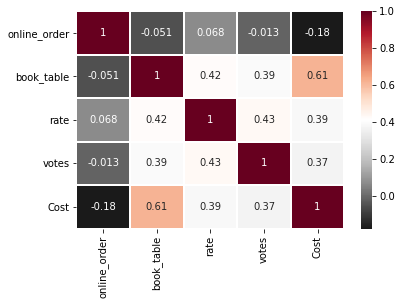

In [249]:
sns.heatmap(df_corr,linewidth = 0.3,annot = True,cmap = 'RdGy_r')

Popular restraunts in bangalore

In [250]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,Cost,reviews,type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet,Banashankari


In [260]:
rest_count = pd.DataFrame(df_zomato['name'].value_counts().reset_index())
rest_count.columns
rest_count.head()

,index,name
0,Cafe Coffee Day,86
1,Onesta,85
2,Empire Restaurant,69
3,Kanti Sweets,68
4,Five Star Chicken,68


In [264]:
plt.bar(rest_count['index'], rest_count['name'], color ='maroon',width = 0.4)

<BarContainer object of 6624 artists>

C:\Users\Prashant\.virtualenvs\zomato_eda\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Prashant\.virtualenvs\zomato_eda\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Prashant\.virtualenvs\zomato_eda\lib\site-packages\matplotlib\textpath.py:65: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\Prashant\.virtualenvs\zomato_eda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Prashant\.virtualenvs\zomato_eda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Prashant\.virtualenvs\zomato_eda\lib\site-packages

KeyboardInterrupt: 

In [ ]:
sns.histplot(rest_count)